In [127]:
# Numerical libraries
import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
# to handle data in form of rows and columns 
import pandas as pd    
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
from scipy.stats import zscore

In [143]:
# 1. Use a new Python notebook and read the data set. Data pre-processing - 
# Understand the data and treat missing values (Use box plot), outliers (5 points)
df = pd.read_csv("vehicle.csv")

In [6]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

Based on info statement
#Total there are 846 records avaialble
#Number of columns are 19
#Based on the infomation above only 5 Columns have all 846 records rest of the columns have missing values.


In [18]:
print("Number of cColumns have null values: ", df.isnull().any().sum())

Number of cColumns have null values:  14


In [46]:
# df[df.isnull().T.any().T]
df.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [34]:
# Data type of all missing values are numeric except "Class" Column.

In [49]:
df_X = df.drop('class', axis=1)
y = df['class']

In [51]:
df_X.isna().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
dtype: bool

In [70]:
df_X.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.828775,6.133943,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.110451,15.740902,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.888095,33.400979,104.0,141.00,168.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.678910,7.882119,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.901775,33.195188,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.933728,7.811559,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.582444,2.588326,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


In [52]:
# Fill Null values with Mean.
df_X = df_X.fillna(df_X.mean())

In [53]:
# Check for Null value
df_X.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
dtype: bool

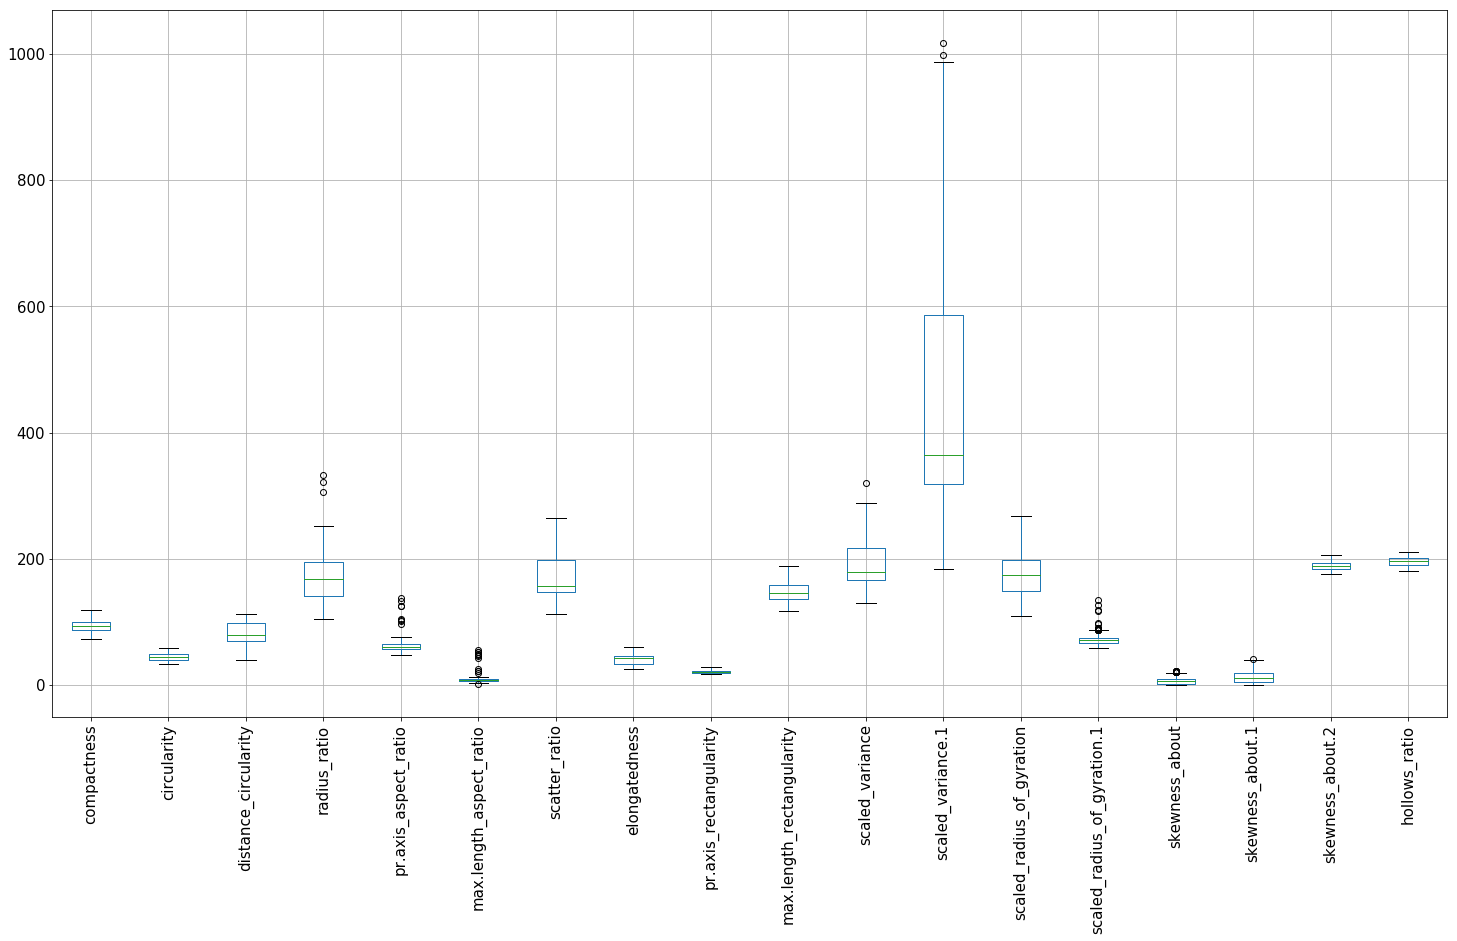

In [67]:
df_X.boxplot(rot=90, figsize=(25,13), fontsize=15)

In [68]:
#Let us pick the columns whcih have outiers and have a closer look at that.
'radius_ratio', 'pr.axis_aspect_ratio ', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1',
'skewness_about','skewness_about.1'

('skewness_about', 'skewness_about.1')

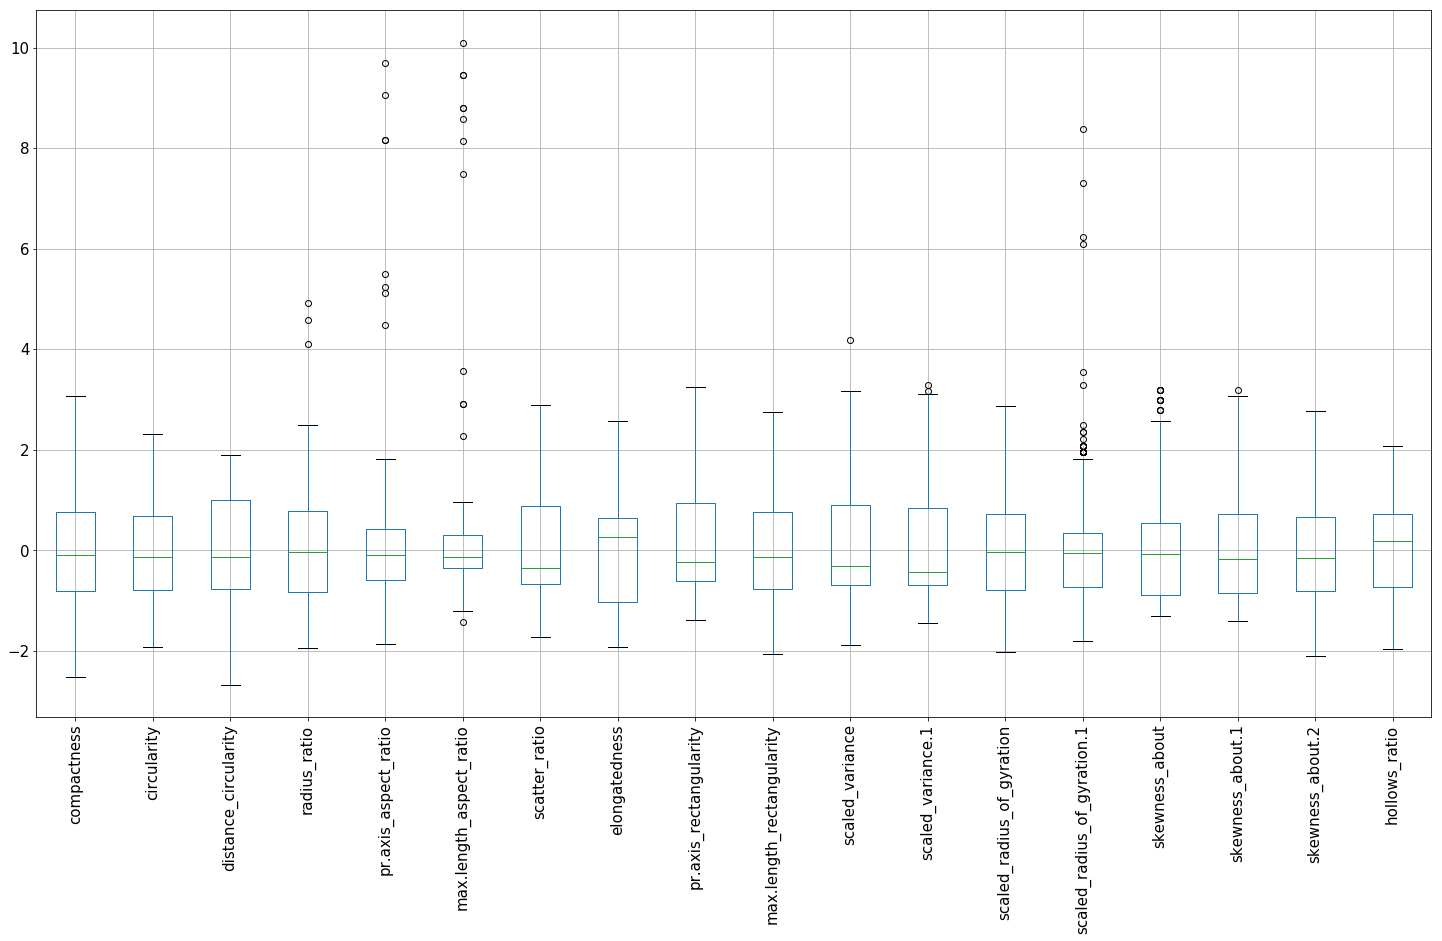

In [129]:
X = df_X.apply(zscore)

X.boxplot(rot=90, figsize=(25,13), fontsize=15)

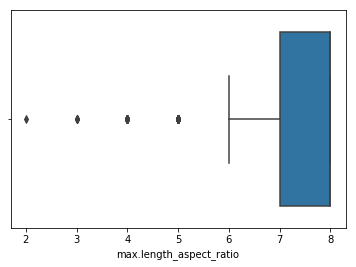

In [142]:
df_X["max.length_aspect_ratio"] = df_X["max.length_aspect_ratio"].mask(df_X["max.length_aspect_ratio"] >df_X["max.length_aspect_ratio"].quantile(.75), df_X["max.length_aspect_ratio"].quantile(.50))

sns.boxplot(df_X["max.length_aspect_ratio"])


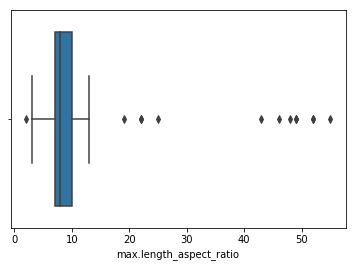

In [133]:
# df_X_new.boxplot(rot=90, figsize=(25,13), fontsize=15)

sns.boxplot(df_X["max.length_aspect_ratio"])

#2.Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

In [147]:
df = pd.read_csv("vehicle.csv")

In [149]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [152]:
X = df.drop('class',axis=1)
y = df['class']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


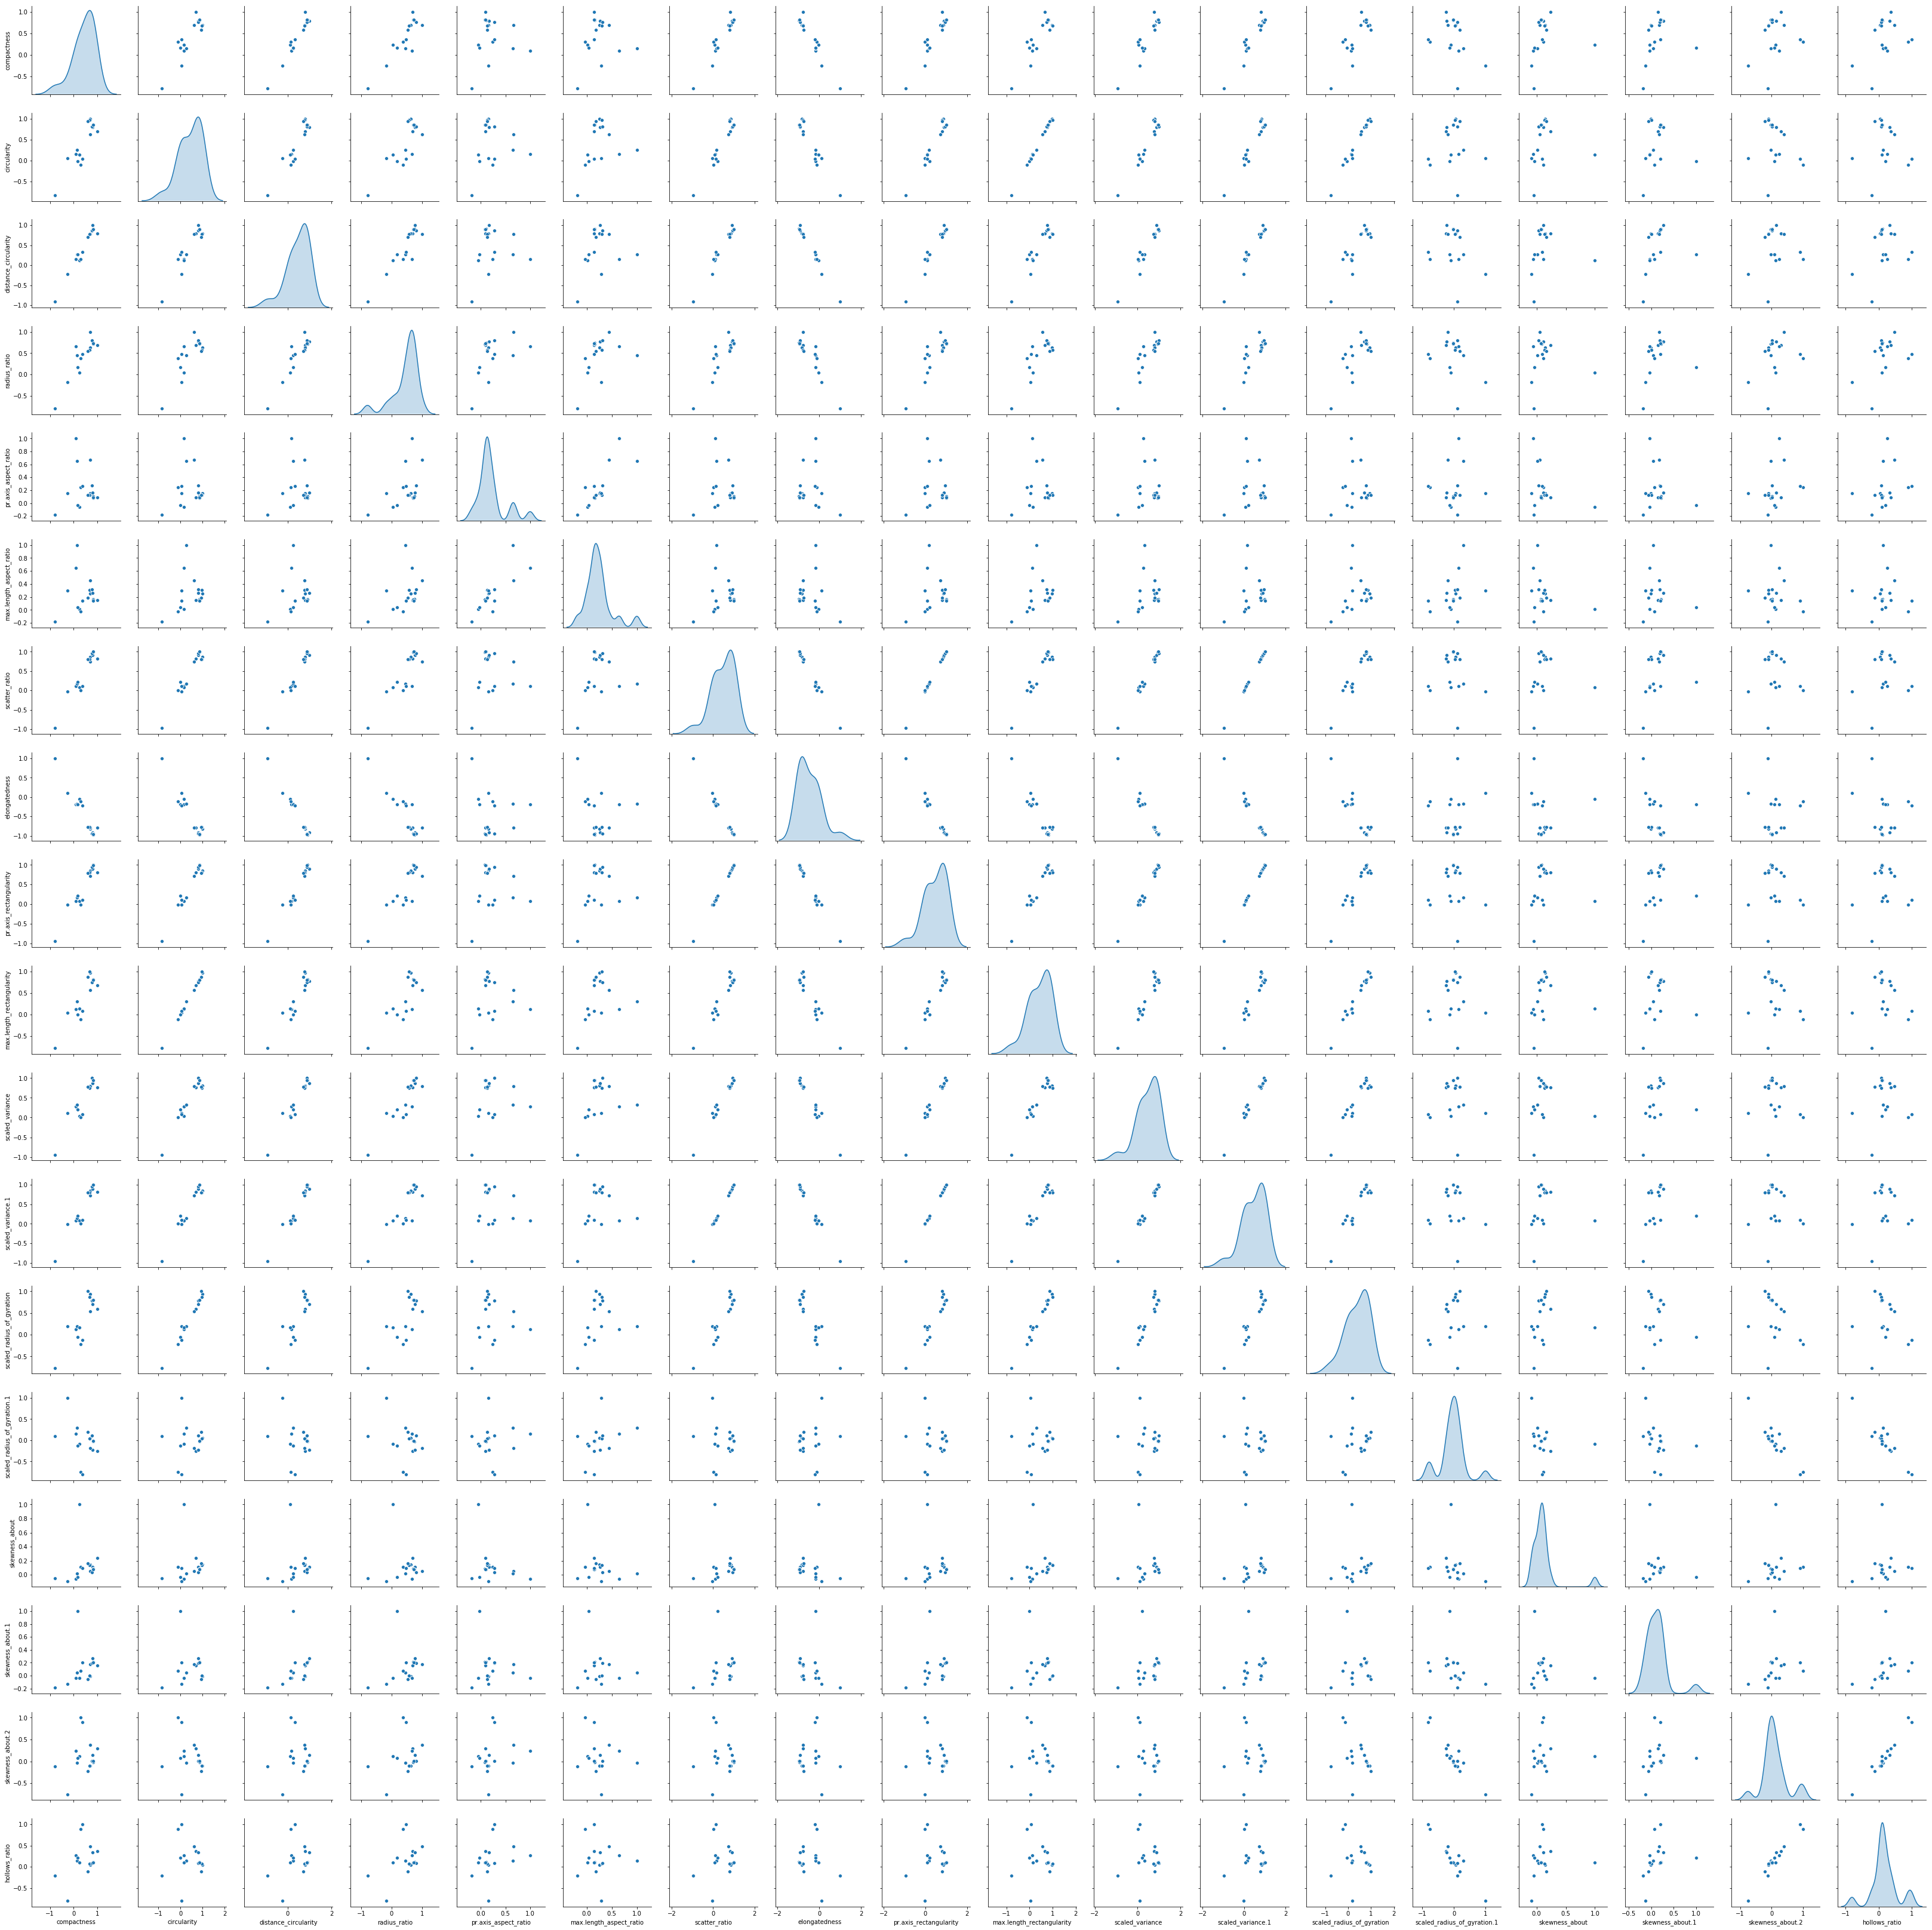

In [153]:
sns.pairplot(df.corr(), diag_kind='kde')

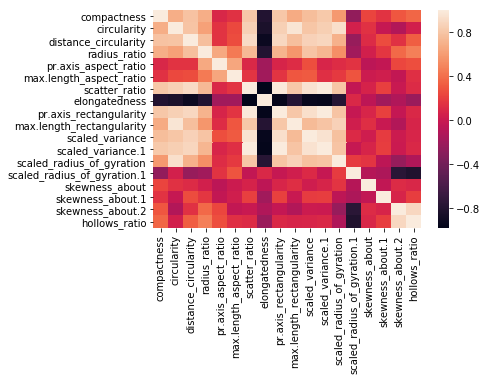

In [157]:
sns.heatmap(df.corr())

We have used Pairplot and Correlation matricx to gaze thru the data. 
Based on the pairplot we can see that some of the features have more than one peak which shows the un even distribution of data
Also based on the heatmap we could see some of the features are highly co-releated and some or not. However based on the above data we cannot arrive at a conculsion on the picking the column for high accuracy. But it gives an overall picture of the data distribution and co-relation. Let's do more detailed analysis on selection of important features.

In [188]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [169]:
# Univariate Selection using SelectKBest with Chi Square test to select top 12 features

In [170]:
# Fill Null values with Mean.
data = df.fillna(df.mean())

X = data.drop('class', axis=1)  #independent columns
y = data['class']    #target column 
#apply SelectKBest class to extract top 12 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 12 best features

                          Specs         Score
11            scaled_variance.1  12687.454790
6                 scatter_ratio   1257.176868
3                  radius_ratio    905.747825
10              scaled_variance    849.752314
2          distance_circularity    501.533755
15             skewness_about.1    455.554333
12    scaled_radius_of_gyration    454.183797
7                 elongatedness    326.346269
14               skewness_about    120.231661
13  scaled_radius_of_gyration.1    101.906419
5       max.length_aspect_ratio     95.261302
0                   compactness     59.506366


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02847087 0.0446066  0.07830772 0.04066741 0.05082165 0.1018222
 0.05516634 0.08954029 0.05568147 0.08039023 0.04168082 0.08895324
 0.03929679 0.05198165 0.01982363 0.02147494 0.05104383 0.06027031]


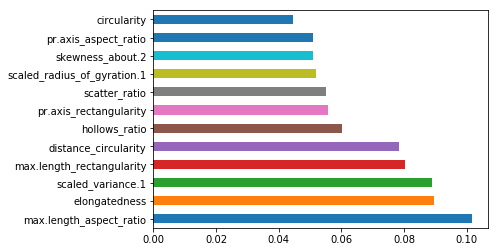

max.length_aspect_ratio        0.101822
elongatedness                  0.089540
scaled_variance.1              0.088953
max.length_rectangularity      0.080390
distance_circularity           0.078308
hollows_ratio                  0.060270
pr.axis_rectangularity         0.055681
scatter_ratio                  0.055166
scaled_radius_of_gyration.1    0.051982
skewness_about.2               0.051044
pr.axis_aspect_ratio           0.050822
circularity                    0.044607
dtype: float64

In [176]:
dataFS = df.fillna(df.mean())
X = dataFS.drop('class', axis=1)  #independent columns
y = dataFS['class']    #target column 
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

feat_importances.nlargest(12)

In [197]:
# As this is a classifier problem i have used Logistic regression to compare the accuracy of the features selected using 
# different feature selection techniques

### Features selected using "ExtraTreesClassifier"
# Logistic Regression
dataFS = df.fillna(df.mean())
dataFS_new = dataFS[['max.length_aspect_ratio','distance_circularity','scatter_ratio','scaled_variance.1','pr.axis_aspect_ratio','pr.axis_rectangularity','scaled_radius_of_gyration.1','max.length_rectangularity','elongatedness','scaled_variance','circularity','hollows_ratio','class']]
X = dataFS_new.drop('class', axis=1)  #independent columns
X = X.apply(zscore)
y = dataFS_new['class']    #target column 

model = LogisticRegression()
model.fit(X,y)
print("Mean Accuracy of Model with Features selected using ExtraTreesClassifier : ",model.score(X,y))



Mean Accuracy of Model with Features selected using ExtraTreesClassifier :  0.8900709219858156


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [200]:
### Features selected using "Univariate Analysis" with SelectKBest using Chi2 method

# Logistic Regression
dataFS = df.fillna(df.mean())
dataFS_new = dataFS[['scaled_variance.1','scatter_ratio','radius_ratio','scaled_variance','distance_circularity','skewness_about.1','scaled_radius_of_gyration','elongatedness','skewness_about',
'scaled_radius_of_gyration.1','max.length_aspect_ratio','compactness','class']]
X = dataFS_new.drop('class', axis=1)  #independent columns
X = X.apply(zscore)
y = dataFS_new['class']    #target column 

model = LogisticRegression()
model.fit(X,y)
print("Mean Accuracy of Model with Features selected using SelectKBest : ",model.score(X,y))



Mean Accuracy of Model with Features selected using SelectKBest :  0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Comparitively the features selected using "ExtraTreesClassifier" gives more accuracy ("0.89"), when compared to "SelectKBest" Technique ("0.83").
The feature selection process is a n iterative process tried with different technique and differnt parameters, however for conceptual pupose of demonstartion i have elimited with selection of two techniques and chose LogisticRegression to valiate the models with the selected feature.

#Univariate analysis with ChiSquare and using SelectKBest and ExtraTree Classifier are a couple of methods used to indentify important features for the model building. Using the above ementioned techniques we have applied this on our model to select the top 12 features to be considered for our model selection. However when the respective techniques are applied on the each model, they gave slightly differnt set of results. The selected features can be tested for accuracy by applying different algorithm and can be tested and validated againt the accuracy score.

3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Data Standardisation:
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. 
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

In [208]:
X = dataFS.drop('class', axis=1)
y = dataFS['class']

sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


The Eigenvectors and Eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [211]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75259459e-01  1.27010856e-01  1.19874162e-01 -7.83109159e-02
  -6.93062475e-02  1.44650156e-01  4.53755811e-01  5.64713964e-01
   4.83554183e-01  2.61221731e-01 -4.64498989e-02  1.34446607e-02
  -1.59324486e-01  6.56773512e-03 -5.98448138e-02 -1.62328028e-03
  -6.05262978e-02 -3.85955867e-04]
 [ 2.93392341e-01 -1.26217125e-01  2.51835016e-02 -1.87525528e-01
   8.50186000e-02 -3.00733370e-01 -2.48092973e-01  1.79295222e-01
   1.45395937e-02 -9.75432534e-02 -2.55383379e-03 -1.97520615e-01
  -1.46192222e-02 -7.98780902e-04  3.96666736e-01  7.62595458e-02
  -3.40071641e-01 -5.85708475e-01]
 [ 3.04556452e-01  7.26862818e-02  5.60058748e-02  7.07959698e-02
  -4.07236757e-02 -1.38488042e-01  7.27989653e-02 -4.36047225e-01
   1.67573501e-01  2.08494817e-01 -7.05942549e-01 -6.37015997e-03
   2.33090309e-01 -3.71748194e-03 -1.51057100e-01 -3.10533715e-02
   6.61582176e-02 -1.58392894e-01]
 [ 2.67593206e-01  1.89635192e-01 -2.75066087e-01  4.22567515e-02
   4.60157077e-02  

Selecting Principal Components:

T In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [213]:
# Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

[(9.408288224869981, array([ 0.27525946,  0.29339234,  0.30455645,  0.26759321,  0.0804939 ,
        0.09721986,  0.31687201, -0.31404236,  0.31395301,  0.28279042,
        0.30931053,  0.31414903,  0.27200252, -0.02091798,  0.04133167,
        0.05833316,  0.03015605,  0.07408137])), (3.016054767551138, array([ 0.12701086, -0.12621713,  0.07268628,  0.18963519,  0.12215874,
       -0.01072778, -0.04804731, -0.01279915, -0.06003514, -0.1161825 ,
       -0.06175369, -0.05327578, -0.20927966, -0.48854187,  0.0549212 ,
        0.12415286,  0.54094767,  0.54027981])), (1.9034788090465513, array([ 0.11987416,  0.0251835 ,  0.05600587, -0.27506609, -0.64204646,
       -0.59179991,  0.09765309, -0.05746458,  0.10950917,  0.0169994 ,
       -0.05646562,  0.10871143,  0.03136852, -0.28621109,  0.11569365,
        0.07548784, -0.00868929, -0.03951431])), (1.1802726839756428, array([-0.07831092, -0.18752553,  0.07079597,  0.04225675, -0.03285779,
       -0.03131997,  0.09598052, -0.08273807,  0.0

In [219]:
# Print the sorted Eigen Values:

# print(len(eigvalues_sorted))
print("Eigenvalues in descending order: ")
for i in eigvalues_sorted:
    print(i)
    
# print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
9.408288224869981
3.016054767551138
1.9034788090465513
1.1802726839756428
0.917174067203537
0.5392798249089146
0.35856646323369606
0.22166172962012345
0.16003619357699025
0.09171408642496613
0.06657518506985187
0.045955682859206405
0.03540238249857494
0.026709610354632277
0.02036906235100399
0.01744141266253084
0.009233570287481242
0.0030880186531058056


Explained Variance After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [220]:
# Explained Varience:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 

# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

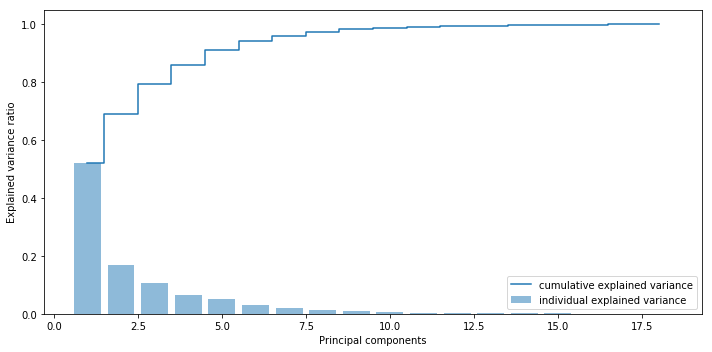

In [242]:
# with plt.style.context('dark_background'):
plt.figure(figsize=(10, 5))
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

The plot above clearly shows that maximum variance (somewhere around 95%) can be explained by the first six principal component alone. Comparatively rest of the components share less amount of information as compared to the rest of the Principal components.So we can drop the the components after 6th component as it has less than 5% of the variance.

In [332]:
# Project data onto lesser dimensions

P_reduce = np.array(eigvectors_sorted[0:12])   # Using all principal components

Proj_data_2D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions
# Proj_data_2D.shape

In [334]:
# # Proj_data_2D

modelL = LogisticRegression()
modelL.fit(Proj_data_2D, y)
modelL.score(Proj_data_2D, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9160756501182034

To validate the PCA techique with the derived variables , i have applied the same Logistic regression to compare the 
results of feature selection with PCA technique.After applying the PCA the accuracy score has increased from 83% to 91%.

In [335]:
# pca = PCA().fit(X_std)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlim(0,6,1)
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')

In [ ]:
# Logistic Regression

# X_std


The above plot shows almost 90% variance by the first 6 components. Therfore we can drop rest of the components.
From Eigenvertor we can use first 6 features to build a model.

In [281]:
# K-Mean

result = dataFS.drop('class', axis=1)
y = dataFS['class']

In [288]:
result_z = result.apply(zscore)
cluster_range = range(2, 10)   
distortion = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 3)
  clusters.fit(result_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  distortion.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortion } )
# clusters_df


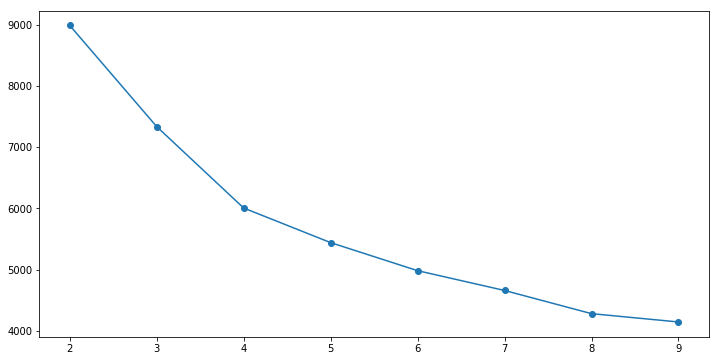

In [287]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
Let us start with 3 clusters.
We will use k=5 to further interpret our clustering result. I'm prefering this number for ease of interpretation in this demo. We can also pick a higher.

In [290]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(result_z)
vehicle_attr_z_copy = result_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [350]:
# cluster.labels_

array([2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0,
       2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 1,
       2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0,
       0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 2,
       1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2,
       0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2,
       1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2,
       2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1,

In [313]:
# As a result of clustering, we have the clustering label. Let's put these labels back into the original numeric data frame.
# print(len(cluster.labels_))
# dataFS['cluster'] = cluster.labels_
# dataFS.head()
# dataFS = dataFS.drop('cluster', axis=1)
result_z['GROUP'] = cluster.labels_


In [355]:
# Handling Outier
data = result_z
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(result_z['GROUP']))
# concat_data = concat_data.join(pd.DataFrame(y))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [338]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(result_z)
# centroids = cluster.cluster_centers_


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

In [356]:
concat_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,GROUP
0,0.160580,0.517302,0.056545,0.272965,1.310206,0.311542,-0.208038,0.136580,-0.225160,0.758332,-0.403077,-0.343028,0.285618,-0.327938,-0.074340,0.380665,-0.312193,0.183957,2
1,-0.325470,-0.624564,0.120112,-0.835442,-0.593962,0.094079,-0.599893,0.520853,-0.611739,-0.344578,-0.594546,-0.620879,-0.513719,-0.059987,0.537873,0.156589,0.013088,0.452977,2
2,1.254193,0.843549,1.518571,1.201630,0.548539,0.311542,1.148382,-1.144331,0.934576,0.689401,1.096764,1.108603,1.392391,0.073989,1.558230,-0.403603,-0.149552,0.049447,1
3,-0.082445,-0.624564,-0.007021,-0.296217,0.167705,0.094079,-0.750606,0.648945,-0.611739,-0.344578,-0.913661,-0.739958,-1.466773,-1.265769,-0.074340,-0.291565,1.639494,1.529056,2
4,-1.054545,-0.135193,-0.769817,-1.135012,-0.720906,-0.340845,-0.599893,0.520853,-0.611739,-0.275646,-0.658369,-0.649231,0.408593,0.743868,0.537873,-0.179527,-1.450677,-1.699181,0


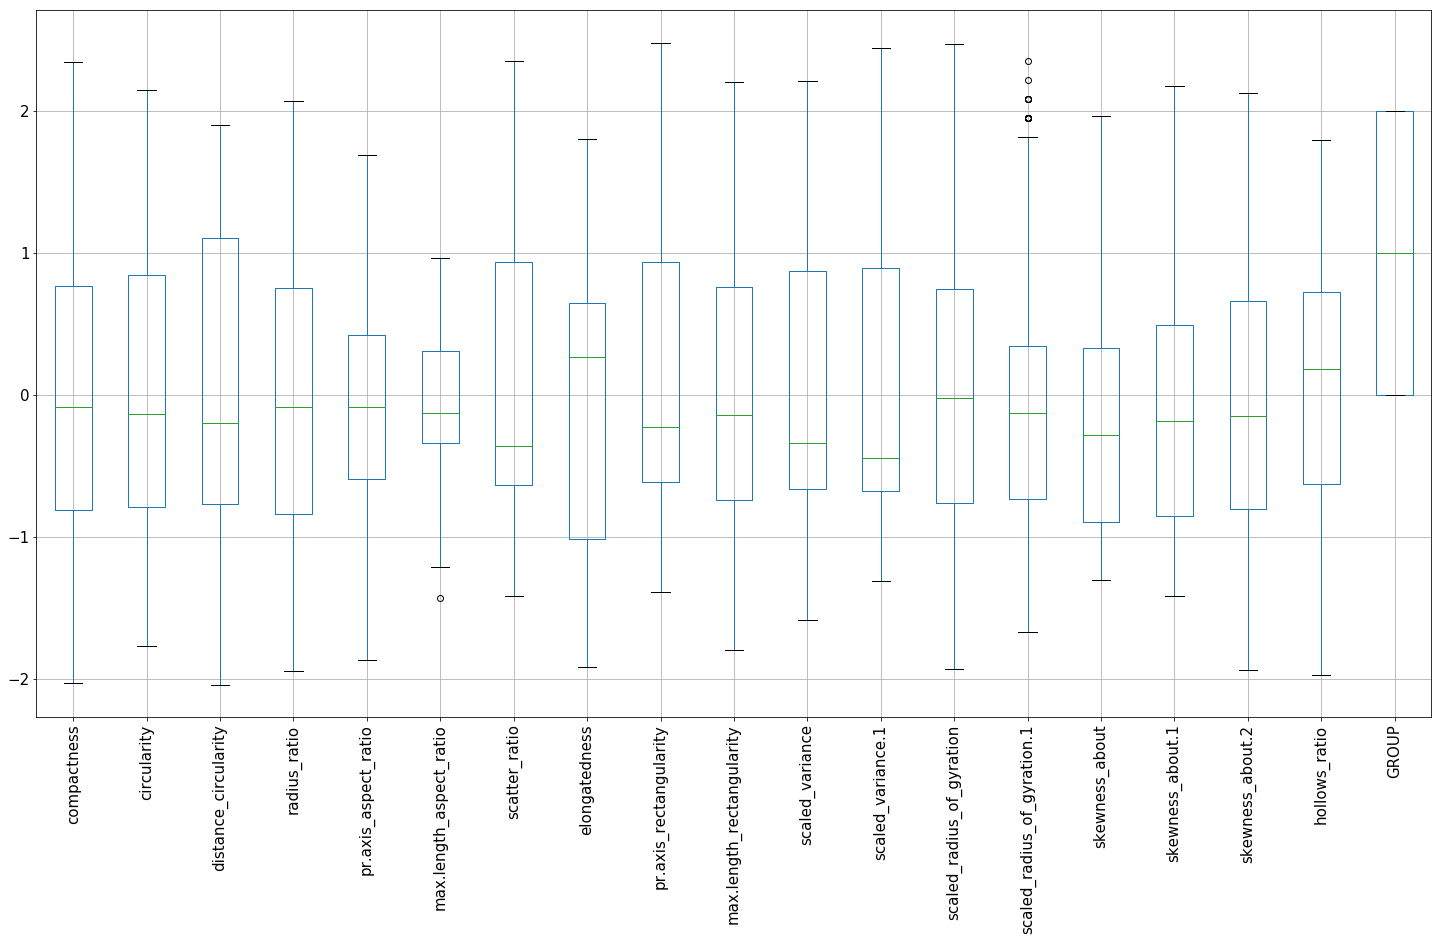

In [358]:
concat_data.boxplot(rot=90, figsize=(25,13), fontsize=15)

Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them

In [391]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and 
find out the best hyper parameters and do cross validation to find the accuracy. (10 points)



In [431]:
# data_corrected.head()
X = data_corrected #result_z.drop('GROUP',axis=1)
y = dataFS['class']

In [432]:
def svc_param_selection(X, y, nfolds):
    result = {}
#     svm = svm.SVC()
    param_grid = [
      {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
      {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']},
     ]
#     param_grid = {'C': Cs}
    grid_search = GridSearchCV(svm.SVC(),param_grid, cv=nfolds)
    grid_search.fit(X, y)
#     result = { "best_params_":grid_search.best_params_, "best_score_": grid_search.best_score_, "best_estimator_":grid_search.best_estimator_}
    grid_search.best_params_
    return grid_search.best_params_

In [433]:
svc_param_selection(X,y, 10)
# print(result)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

{'C': 1, 'kernel': 'rbf'}

In [427]:
# svc_param_selection(X,y, 10, 'linear')

Based on Gridsearch CV with Linear and rbf kernal, the optimal hyper parameters as mentioned below
- C = 1
- Kernal = 'rbf'
This derived based on the best score returned by the grid search cv methods. 
Bestscore for 'rbf' kernal : 0.966903073286052
Bestscore for 'linear' kernal : 0.9491725768321513


In [434]:
svc_model = SVC(C= 1, kernel='rbf', gamma= 1)
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size = 0.33, random_state = 10)
                                                 
svc_model.fit(X_test, y_test)
prediction = svc_model.predict(X_test)
print("Test Score :",svc_model.score(X_test,y_test))
print("Training Score :",svc_model.score(X_train,y_train))

Test Score : 0.9982332155477032
Training Score : 0.7964285714285714
